# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis

1. The warmest cities are those closest to the equator 
2. Most cities have a windspeed of 0-10 mph
3. Most cities have humidity levels above 60%

In [42]:
# Dependencies and Setup
%matplotlib inline
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [4]:
print(cities)

['mataura', 'port macquarie', 'yellowknife', 'port hardy', 'akureyri', 'flinders', 'hilo', 'saint-philippe', 'lata', 'maceio', 'butaritari', 'ushuaia', 'mazagao', 'kodiak', 'tuatapere', 'lorengau', 'hithadhoo', 'thompson', 'seoul', 'ribeira grande', 'tura', 'melfi', 'pascagoula', 'rikitea', 'vaini', 'punta arenas', 'bredasdorp', 'hobart', 'taolanaro', 'vaitupu', 'grand river south east', 'severo-kurilsk', 'palmer', 'los chiles', 'usvyaty', 'pangnirtung', 'san cristobal', 'tautira', 'albany', 'barrow', 'bridlington', 'cabo san lucas', 'san vicente', 'belushya guba', 'busselton', 'shimoda', 'hermanus', 'wageningen', 'puerto ayora', 'chapais', 'kapaa', 'toliary', 'port elizabeth', 'aswan', 'pacific grove', 'pachora', 'castro', 'tilichiki', 'aden', 'pangody', 'agadir', 'guerrero negro', 'sangar', 'yerbogachen', 'walvis bay', 'nikolskoye', 'vestmannaeyjar', 'bambous virieux', 'esperance', 'conde', 'codrington', 'jamestown', 'skibbereen', 'new norfolk', 'olga', 'kalmunai', 'lebu', 'illoqqort

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
#create counter for number of cities that have been run
city_counter = 0
city_total = len(cities)

#create lists for each datapoint needed
citylist = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = [] 
wind_speed = []

#create API call and response
for city in cities:
    url = "https://api.openweathermap.org/data/2.5/weather?q="+ city + "&appid="+ api_key + "&units=Imperial"
    
    #Replace all spaces in url with '+' and print new cleaned version of url
    cleaned_url = url.replace(" ", "+")
    
    response = requests.get(cleaned_url).json()
    city_counter += 1
    try:
        city_id = response['id']
        print(f"Processing Record {city_counter} of {city_total} Cities Total | City Name: {city} City ID: {city_id}")
        print(cleaned_url)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        citylist.append(city)
    except:
        print(f"Processing Record {city_counter} of {city_total} Cities Total | City Name: {city} City ID: Not Found")
        print("City not found. Skipping...")

Processing Record 1 of 614 Cities Total | City Name: mataura City ID: 6201424
https://api.openweathermap.org/data/2.5/weather?q=mataura&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 2 of 614 Cities Total | City Name: port macquarie City ID: 2152659
https://api.openweathermap.org/data/2.5/weather?q=port+macquarie&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 3 of 614 Cities Total | City Name: yellowknife City ID: 6185377
https://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 4 of 614 Cities Total | City Name: port hardy City ID: 6111862
https://api.openweathermap.org/data/2.5/weather?q=port+hardy&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 5 of 614 Cities Total | City Name: akureyri City ID: 2633274
https://api.openweathermap.org/data/2.5/weather?q=akureyri&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 6 

Processing Record 45 of 614 Cities Total | City Name: busselton City ID: 2075265
https://api.openweathermap.org/data/2.5/weather?q=busselton&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 46 of 614 Cities Total | City Name: shimoda City ID: 1852357
https://api.openweathermap.org/data/2.5/weather?q=shimoda&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 47 of 614 Cities Total | City Name: hermanus City ID: 3366880
https://api.openweathermap.org/data/2.5/weather?q=hermanus&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 48 of 614 Cities Total | City Name: wageningen City ID: 2745087
https://api.openweathermap.org/data/2.5/weather?q=wageningen&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 49 of 614 Cities Total | City Name: puerto ayora City ID: 3652764
https://api.openweathermap.org/data/2.5/weather?q=puerto+ayora&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 50 of

Processing Record 88 of 614 Cities Total | City Name: inhambane City ID: 1045114
https://api.openweathermap.org/data/2.5/weather?q=inhambane&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 89 of 614 Cities Total | City Name: halalo City ID: Not Found
City not found. Skipping...
Processing Record 90 of 614 Cities Total | City Name: aberystwyth City ID: 2657782
https://api.openweathermap.org/data/2.5/weather?q=aberystwyth&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 91 of 614 Cities Total | City Name: coihaique City ID: 3894426
https://api.openweathermap.org/data/2.5/weather?q=coihaique&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 92 of 614 Cities Total | City Name: grand gaube City ID: 934479
https://api.openweathermap.org/data/2.5/weather?q=grand+gaube&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 93 of 614 Cities Total | City Name: port alfred City ID: 964432
https://api.openweather

Processing Record 133 of 614 Cities Total | City Name: honningsvag City ID: 779554
https://api.openweathermap.org/data/2.5/weather?q=honningsvag&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 134 of 614 Cities Total | City Name: catamarca City ID: 3837702
https://api.openweathermap.org/data/2.5/weather?q=catamarca&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 135 of 614 Cities Total | City Name: saleaula City ID: Not Found
City not found. Skipping...
Processing Record 136 of 614 Cities Total | City Name: chichli City ID: 1274267
https://api.openweathermap.org/data/2.5/weather?q=chichli&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 137 of 614 Cities Total | City Name: avarua City ID: 4035715
https://api.openweathermap.org/data/2.5/weather?q=avarua&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 138 of 614 Cities Total | City Name: olustvere City ID: 587590
https://api.openweathermap.org/

Processing Record 177 of 614 Cities Total | City Name: araouane City ID: 2460954
https://api.openweathermap.org/data/2.5/weather?q=araouane&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 178 of 614 Cities Total | City Name: sorland City ID: 3137469
https://api.openweathermap.org/data/2.5/weather?q=sorland&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 179 of 614 Cities Total | City Name: qui nhon City ID: 1568574
https://api.openweathermap.org/data/2.5/weather?q=qui+nhon&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 180 of 614 Cities Total | City Name: banda aceh City ID: 1215502
https://api.openweathermap.org/data/2.5/weather?q=banda+aceh&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 181 of 614 Cities Total | City Name: saskylakh City ID: 2017155
https://api.openweathermap.org/data/2.5/weather?q=saskylakh&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 182 of 6

Processing Record 220 of 614 Cities Total | City Name: tasiilaq City ID: 3424607
https://api.openweathermap.org/data/2.5/weather?q=tasiilaq&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 221 of 614 Cities Total | City Name: bitung City ID: 1648636
https://api.openweathermap.org/data/2.5/weather?q=bitung&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 222 of 614 Cities Total | City Name: fortuna City ID: 5563839
https://api.openweathermap.org/data/2.5/weather?q=fortuna&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 223 of 614 Cities Total | City Name: arraial do cabo City ID: 3471451
https://api.openweathermap.org/data/2.5/weather?q=arraial+do+cabo&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 224 of 614 Cities Total | City Name: kungurtug City ID: 1501377
https://api.openweathermap.org/data/2.5/weather?q=kungurtug&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 22

Processing Record 263 of 614 Cities Total | City Name: bestobe City ID: 1525376
https://api.openweathermap.org/data/2.5/weather?q=bestobe&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 264 of 614 Cities Total | City Name: kazalinsk City ID: Not Found
City not found. Skipping...
Processing Record 265 of 614 Cities Total | City Name: barra dos coqueiros City ID: 3470674
https://api.openweathermap.org/data/2.5/weather?q=barra+dos+coqueiros&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 266 of 614 Cities Total | City Name: iiyama City ID: 1861838
https://api.openweathermap.org/data/2.5/weather?q=iiyama&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 267 of 614 Cities Total | City Name: bar harbor City ID: 4957320
https://api.openweathermap.org/data/2.5/weather?q=bar+harbor&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 268 of 614 Cities Total | City Name: jiddah City ID: Not Found
City not fo

Processing Record 308 of 614 Cities Total | City Name: innisfail City ID: 2162683
https://api.openweathermap.org/data/2.5/weather?q=innisfail&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 309 of 614 Cities Total | City Name: port blair City ID: 1259385
https://api.openweathermap.org/data/2.5/weather?q=port+blair&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 310 of 614 Cities Total | City Name: chokwe City ID: 1048364
https://api.openweathermap.org/data/2.5/weather?q=chokwe&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 311 of 614 Cities Total | City Name: massaguet City ID: 2428231
https://api.openweathermap.org/data/2.5/weather?q=massaguet&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 312 of 614 Cities Total | City Name: avera City ID: 4231997
https://api.openweathermap.org/data/2.5/weather?q=avera&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 313 of 614 Cit

Processing Record 353 of 614 Cities Total | City Name: humaita City ID: 3664078
https://api.openweathermap.org/data/2.5/weather?q=humaita&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 354 of 614 Cities Total | City Name: benghazi City ID: 88319
https://api.openweathermap.org/data/2.5/weather?q=benghazi&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 355 of 614 Cities Total | City Name: marrakesh City ID: 2542997
https://api.openweathermap.org/data/2.5/weather?q=marrakesh&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 356 of 614 Cities Total | City Name: mahon City ID: 2514301
https://api.openweathermap.org/data/2.5/weather?q=mahon&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 357 of 614 Cities Total | City Name: alice springs City ID: 2077895
https://api.openweathermap.org/data/2.5/weather?q=alice+springs&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 358 of 614

Processing Record 396 of 614 Cities Total | City Name: uribia City ID: 3666409
https://api.openweathermap.org/data/2.5/weather?q=uribia&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 397 of 614 Cities Total | City Name: alyangula City ID: 2079582
https://api.openweathermap.org/data/2.5/weather?q=alyangula&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 398 of 614 Cities Total | City Name: kimbe City ID: 2093967
https://api.openweathermap.org/data/2.5/weather?q=kimbe&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 399 of 614 Cities Total | City Name: panama city City ID: 3703443
https://api.openweathermap.org/data/2.5/weather?q=panama+city&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 400 of 614 Cities Total | City Name: itoman City ID: 1861280
https://api.openweathermap.org/data/2.5/weather?q=itoman&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 401 of 614 Cities 

Processing Record 439 of 614 Cities Total | City Name: kargasok City ID: 1504382
https://api.openweathermap.org/data/2.5/weather?q=kargasok&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 440 of 614 Cities Total | City Name: nantucket City ID: 4944903
https://api.openweathermap.org/data/2.5/weather?q=nantucket&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 441 of 614 Cities Total | City Name: griffith City ID: 4920986
https://api.openweathermap.org/data/2.5/weather?q=griffith&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 442 of 614 Cities Total | City Name: chuy City ID: 3443061
https://api.openweathermap.org/data/2.5/weather?q=chuy&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 443 of 614 Cities Total | City Name: hamada City ID: 1863310
https://api.openweathermap.org/data/2.5/weather?q=hamada&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 444 of 614 Cities Tota

Processing Record 483 of 614 Cities Total | City Name: katherine City ID: 2068655
https://api.openweathermap.org/data/2.5/weather?q=katherine&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 484 of 614 Cities Total | City Name: kayanza City ID: 430951
https://api.openweathermap.org/data/2.5/weather?q=kayanza&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 485 of 614 Cities Total | City Name: kankaanpaa City ID: 654363
https://api.openweathermap.org/data/2.5/weather?q=kankaanpaa&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 486 of 614 Cities Total | City Name: hobyo City ID: 57000
https://api.openweathermap.org/data/2.5/weather?q=hobyo&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 487 of 614 Cities Total | City Name: urubicha City ID: 3901969
https://api.openweathermap.org/data/2.5/weather?q=urubicha&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 488 of 614 Cities 

Processing Record 527 of 614 Cities Total | City Name: trofors City ID: 3133983
https://api.openweathermap.org/data/2.5/weather?q=trofors&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 528 of 614 Cities Total | City Name: russell City ID: 4047434
https://api.openweathermap.org/data/2.5/weather?q=russell&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 529 of 614 Cities Total | City Name: iquitos City ID: 3696183
https://api.openweathermap.org/data/2.5/weather?q=iquitos&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 530 of 614 Cities Total | City Name: la sarre City ID: 6050194
https://api.openweathermap.org/data/2.5/weather?q=la+sarre&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 531 of 614 Cities Total | City Name: linda City ID: 5366531
https://api.openweathermap.org/data/2.5/weather?q=linda&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 532 of 614 Cities Total 

Processing Record 570 of 614 Cities Total | City Name: cedar city City ID: 5536630
https://api.openweathermap.org/data/2.5/weather?q=cedar+city&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 571 of 614 Cities Total | City Name: chase City ID: 5920381
https://api.openweathermap.org/data/2.5/weather?q=chase&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 572 of 614 Cities Total | City Name: visby City ID: 2662689
https://api.openweathermap.org/data/2.5/weather?q=visby&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 573 of 614 Cities Total | City Name: ust-nera City ID: 2120048
https://api.openweathermap.org/data/2.5/weather?q=ust-nera&appid=9b74b52ab9ed11fe0630c775a0009fa5&units=Imperial
Processing Record 574 of 614 Cities Total | City Name: grand centre City ID: Not Found
City not found. Skipping...
Processing Record 575 of 614 Cities Total | City Name: san policarpo City ID: 1688696
https://api.openweathermap.org/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
# create a dictionary with all variables 
citydata = {
    "City": citylist,
    "Country" : country,
    "Date" : date,
    "Cloudiness (%)" : cloudiness,
    "Humidity (%)" : humidity,
    "Latitude (Deg)" : lat,
    "Longitude (Deg)" : long, 
    "Max Temperature (F)": max_temp,
    "Wind Speed (mph)" : wind_speed
}

In [71]:
# convert dictionary into dataframe & check row count for each column
citydata_df = pd.DataFrame(citydata)
citydata_df.count()


City                   570
Country                570
Date                   570
Cloudiness (%)         570
Humidity (%)           570
Latitude (Deg)         570
Longitude (Deg)        570
Max Temperature (F)    570
Wind Speed (mph)       570
dtype: int64

In [72]:
# preview dataframe
citydata_df.head()

,City,Country,Date,Cloudiness (%),Humidity (%),Latitude (Deg),Longitude (Deg),Max Temperature (F),Wind Speed (mph)
0,mataura,NZ,1581994162,99,80,-46.19,168.86,66.00,5.01
1,port macquarie,AU,1581993990,40,70,-31.43,152.92,89.01,8.05
2,yellowknife,CA,1581994163,5,74,62.46,-114.35,-22.00,5.82
3,port hardy,CA,1581994163,20,100,50.70,-127.42,35.60,4.70
4,akureyri,IS,1581994164,90,97,65.68,-18.09,32.00,9.17


In [63]:
# export dataframe to csv file
citydata_df.to_csv("citydata_df.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [73]:
# Create a list for converted date
from datetime import datetime
converted_date = [] 

# Use for loop to append date conversion to converted_date list and add as new column to dataframe
for day in citydata_df['Date']:
    converted_day = datetime.utcfromtimestamp(day).strftime('%Y-%m-%d')
    converted_date.append(converted_day)

citydata_df['Converted Date'] = converted_date
citydata_df.head()

,City,Country,Date,Cloudiness (%),Humidity (%),Latitude (Deg),Longitude (Deg),Max Temperature (F),Wind Speed (mph),Converted Date
0,mataura,NZ,1581994162,99,80,-46.19,168.86,66.00,5.01,2020-02-18
1,port macquarie,AU,1581993990,40,70,-31.43,152.92,89.01,8.05,2020-02-18
2,yellowknife,CA,1581994163,5,74,62.46,-114.35,-22.00,5.82,2020-02-18
3,port hardy,CA,1581994163,20,100,50.70,-127.42,35.60,4.70,2020-02-18
4,akureyri,IS,1581994164,90,97,65.68,-18.09,32.00,9.17,2020-02-18


#### Latitude vs. Temperature Plot

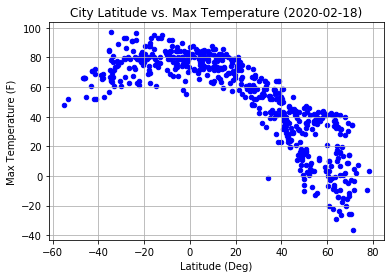

In [75]:
citydata_df.plot(kind='scatter', x='Latitude (Deg)', y='Max Temperature (F)', c='Blue')
plt.title(f'City Latitude vs. Max Temperature ({converted_date[0]})')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Max Temperature (F)')
plt.grid()

# create new directory called 'figures' if it does not exist
try:
    os.stat("figures")
except:
    os.mkdir("figures")

# save figure to 'figures'
plt.savefig(os.path.join("figures","Lat vs Temp.png"))

#### Latitude vs. Humidity Plot

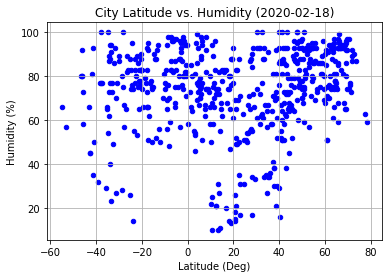

In [76]:
citydata_df.plot(kind='scatter', x='Latitude (Deg)', y='Humidity (%)', c='Blue')
plt.title(f'City Latitude vs. Humidity ({converted_date[0]})')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Humidity (%)')
plt.grid()

# save figure to 'figures'
plt.savefig(os.path.join("figures","Lat vs Humidity.png"))

#### Latitude vs. Cloudiness Plot

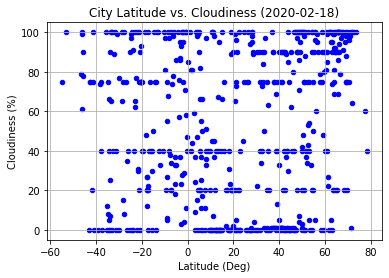

In [77]:
citydata_df.plot(kind='scatter', x='Latitude (Deg)', y='Cloudiness (%)', c='Blue')
plt.title(f'City Latitude vs. Cloudiness ({converted_date[0]})')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness (%)')
plt.grid()

# save figure to 'figures'
plt.savefig(os.path.join("figures","Lat vs Cloudiness.png"))

#### Latitude vs. Wind Speed Plot

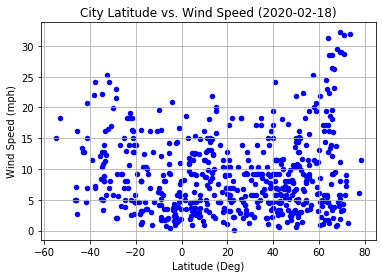

In [79]:
citydata_df.plot(kind='scatter', x='Latitude (Deg)', y='Wind Speed (mph)', c='Blue')
plt.title(f'City Latitude vs. Wind Speed ({converted_date[0]})')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# save figure to 'figures'
plt.savefig(os.path.join("figures","Lat vs Wind Speed.png"))